## Part 1: LLE
Implement Locally Linear Embedding function

In [10]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse      import csr_matrix
from numpy             import matlib
import numpy as np


def csr_from_mat(W, NI):
    n, k = W.shape
    data = np.reshape(W, n*k)
    cols = np.reshape(NI, n*k)
    rows = np.floor(np.arange(0, n, 1/k))
    return csr_matrix((data, (rows, cols)), shape=(n, n))

def lle_neighborhood(X, k):
    n, d = X.shape
    NN = kneighbors_graph(X, k, mode='connectivity')
    return np.reshape(NN.indices, (n, k))

def lle_weights(X, NI):
    n, d = X.shape
    n, k = NI.shape
    tol  = 1e-3 if k>d else 0
    W = np.zeros((n, k))
    for i in range(n):
        Z = (X[NI[i,:],:] - matlib.repmat(X[i,:], k, 1)).T
        C = Z.T.dot(Z)
        C = C + tol*np.trace(C)*np.identity(k)
        w = np.linalg.inv(C).dot(np.ones((k, 1)))
        w = w / np.sum(w)
        W[i,:] = w.T
    return W

def lle_embedding(W, m):
    n, n = W.shape
    I, W = np.identity(n), W
    M = (I-W).T.dot(I-W)
    w, v = np.linalg.eig(M)
    i = np.argsort(w)
    w, v = w[i].real, v[:,i].real
    # did i do wrong here?
    return v[:,1:m+1]

"""Args:
X: input samples, array (num, dim)
n_components: dimension of output data
n_neighbours: neighborhood size

Returns:
Y: output samples, array (num, n_components)
"""
def LLE(X, n_components=2, n_neighbours=10):
    NI = lle_neighborhood(X, n_neighbours)
    W  = lle_weights(X, NI)
    W  = csr_from_mat(W, NI)
    Y  = lle_embedding(W, n_components)
    return Y

## Part 2: Manifold Visualization
Visualize the S-shaped 3-d dataset using the LLE.

In [11]:
from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

<IPython.core.display.Javascript object>


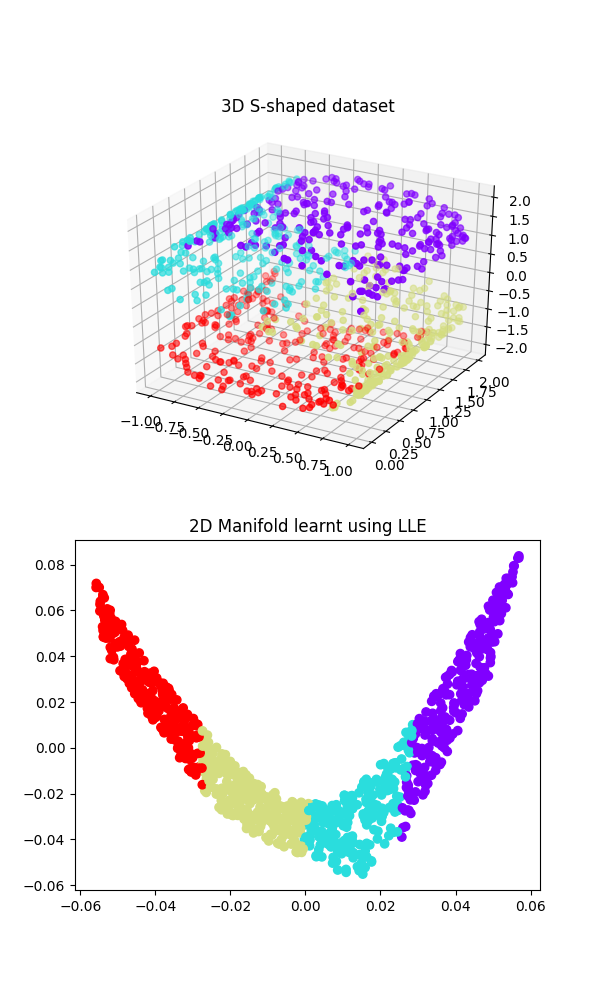

In [13]:
#  Visualization code here
from matplotlib import pyplot as plt
%matplotlib notebook

LX = LLE(SX, 2)

fig = plt.figure(figsize=(6, 10))
axi = fig.add_subplot(211, projection='3d')
colorize = dict(c=St, cmap=plt.cm.get_cmap('rainbow', 4))
axi.scatter3D(SX[:, 0], SX[:, 1], SX[:, 2], **colorize)
axi.title.set_text('3D S-shaped dataset')

axi = fig.add_subplot(212)
axi.scatter([LX[:, 0]], [LX[:, 1]], **colorize)
axi.title.set_text('2D Manifold learnt using LLE')


## Part 3: Visualizing high-dimensional data
Visualize the Swiss roll dataset using LLE.

In [14]:
# Swiss roll dataset loading here
import numpy


d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


The code in the next cell should draw a single plot with the following subplots:

1. Visualize Swiss roll.
2. Unwrap the manifold in 2D and visualize using LLE.

<IPython.core.display.Javascript object>


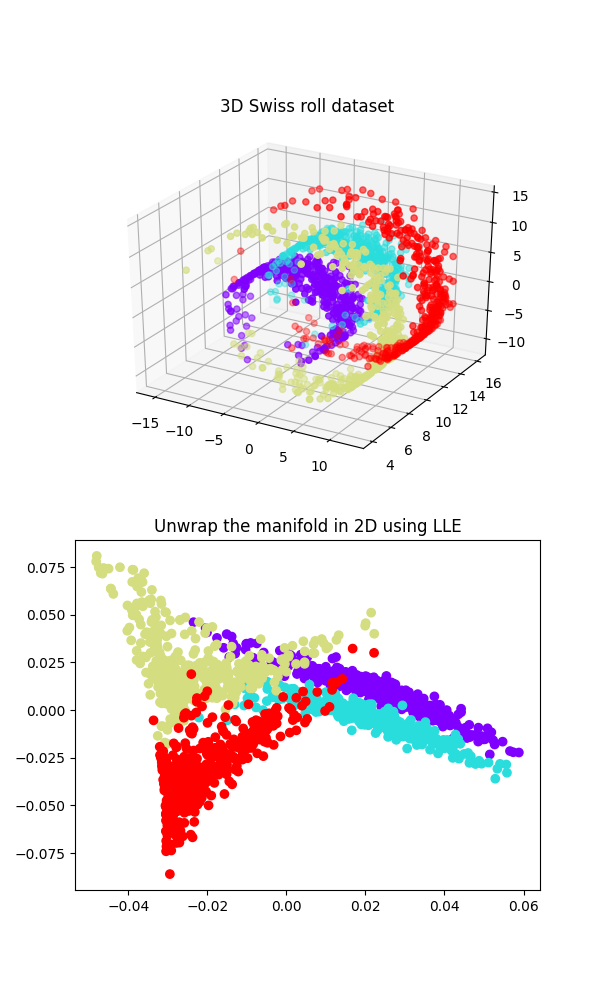

In [15]:
import numpy    as np
from matplotlib import pyplot as plt
%matplotlib notebook

X  = swissroll
Xc = np.linspace(0, 1, X.shape[0])
LX = LLE(X, 2)

fig = plt.figure(figsize=(6, 10))
axi = fig.add_subplot(211, projection='3d')
colorize = dict(c=Xc, cmap=plt.cm.get_cmap('rainbow', 4))
axi.scatter3D(X[:, 0], X[:, 1], X[:, 2], **colorize)
axi.title.set_text('3D Swiss roll dataset')

axi = fig.add_subplot(212)
axi.scatter([LX[:, 0]], [LX[:, 1]], **colorize)
axi.title.set_text('Unwrap the manifold in 2D using LLE')